# Imports e dependências

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

import pickle

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from yellowbrick.classifier import ConfusionMatrix

from sklearn import tree

# Carregamento de dados

In [23]:

# Abrir dados formatados de arquivo e transferir para variáveis
with open('Dados/restaurante.pkl', 'rb') as f:
    x_treino, x_teste, y_treino, y_teste = pickle.load(f)

# Criar árvore

In [24]:
# Definir critério da árvore como sendo entropia
modelo = DecisionTreeClassifier(criterion='entropy')

Y = modelo.fit(x_treino, y_treino)

# Testar modelo

### Testar árvore

In [25]:
previsoes = modelo.predict(x_teste)

### Obter acurácia do teste

In [26]:
accuracy_score(y_teste, previsoes)

0.5

### Matriz de confusão

In [27]:
confusion_matrix(y_teste, previsoes)

array([[1, 1],
       [0, 0]])

c:\Linguagens\Python\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.5

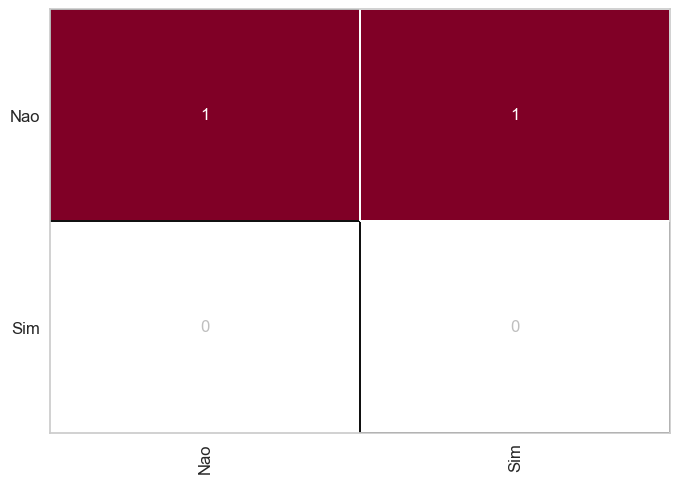

In [28]:
cm = ConfusionMatrix(modelo)
cm.fit(x_treino, y_treino)
cm.score(x_teste, y_teste)

In [29]:

print(classification_report(y_teste, previsoes))

              precision    recall  f1-score   support

         Nao       1.00      0.50      0.67         2
         Sim       0.00      0.00      0.00         0

    accuracy                           0.50         2
   macro avg       0.50      0.25      0.33         2
weighted avg       1.00      0.50      0.67         2



c:\Linguagens\Python\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Linguagens\Python\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Linguagens\Python\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


# Resultado

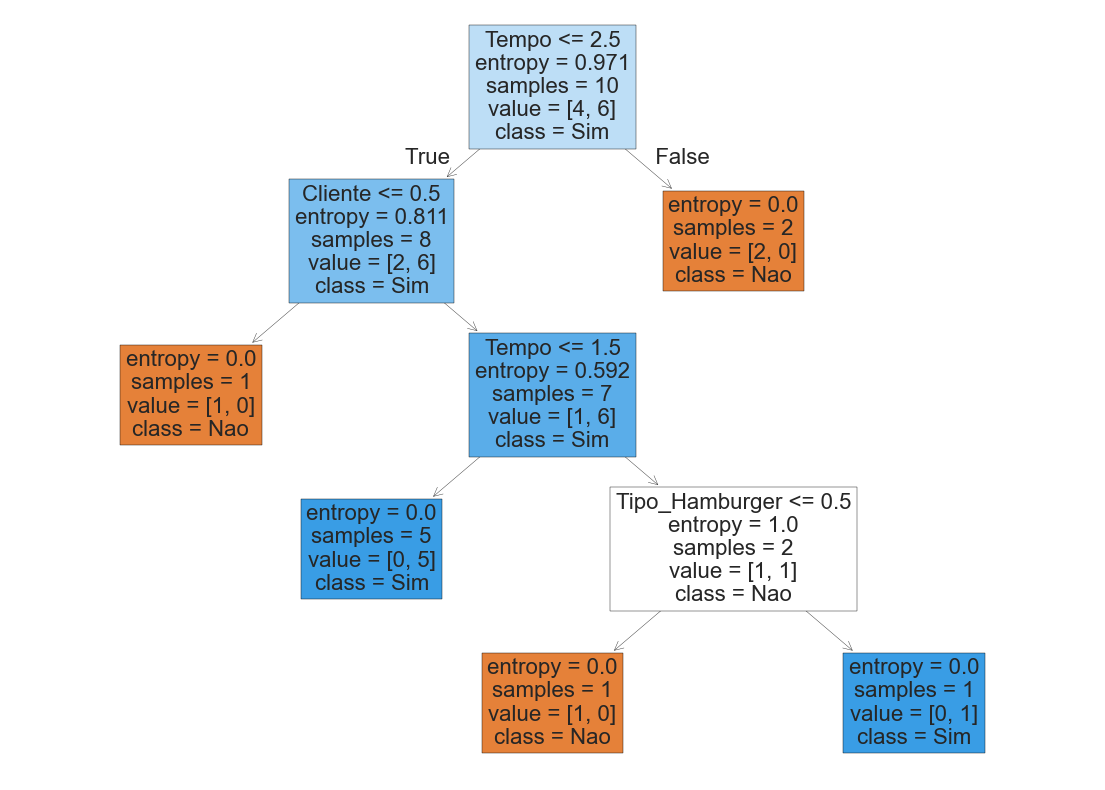

In [31]:
previsores = x_treino.columns
figura, eixos = plt.subplots(nrows=1, ncols=1, figsize=(14,10))
tree.plot_tree(modelo, feature_names=previsores, class_names = modelo.classes_, filled=True, fontsize=16);